<a href="https://colab.research.google.com/github/Jax45/Deepfake-Detection/blob/main/DeepFake_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5390 Deep Learning UMSL
## sp21 Semester Project
### Jackson Hoenig



# Creating the dataset
For this dataset, I took 208 pictures of myself with different lightings, different backgrounds, and different expressions. This became the Real dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # I then cropped them to all be squares with this code:
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))
def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))
import os
from PIL import Image
count = 0
for filename in os.listdir('/content/drive/My Drive/DeepfakeDataset/Real_Images/'):
    count += 1;
    if filename.endswith(".jpg"): 
        # print(os.path.join('/content/drive/My Drive/Real_Images/', filename))
        im = Image.open('/content/drive/My Drive/Real_Images_Cropped/' + filename)
        im_crop = crop_max_square(im)
        im_crop = im_crop.rotate(90, expand=True)
#this sets all the images to 256x256
          im_crop = im_crop.resize((256,256))
        im_crop.save('/content/drive/My Drive/Real_Images_Cropped/' + filename, quality=95)
        continue;
    else:
        continue

print(count)

503


For the fake images, I used https://colab.research.google.com/drive/1hjSakjW2YZqi8NUImERd0d5zWTKBkYyF#scrollTo=VXHr0ZZR4Gha
to make deepfake videos with various driving videos but the images from the real dataset.

At this point I separated the deepfaked videos into frames and saved them to a folder called Fake_Images.

In [ ]:
import cv2
genStr = "gen9"
vidcap = cv2.VideoCapture('/content/drive/My Drive/Faked_Videos/' + genStr + '.mp4')
success,image = vidcap.read()
count = 0
print(success)
while success:
  if count % 5 == 0:
    print(count)
    cv2.imwrite("/content/drive/My Drive/DeepfakeDataset/Fake_Images/" + genStr + "_frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  # print('Read a new frame: ', success)
  count += 1

True
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145


Finally I saved the resulting 2 folders (Fake_Images and Real_Images) to a zip file.

# Loading the data

In [ ]:
import requests, zipfile, io, os
import os

print('Downloading and unzipping test file.')
r = requests.get('https://github.com/Jax45/Deepfake-Detection/raw/main/DeepfakeDataset-001.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#Separate the data into Train, Validatation, and Test folders
 while maintaining the difference between fake and real image.

In [ ]:
#create the directory paths
!mkdir SplitDataset
!mkdir SplitDataset/train
!mkdir SplitDataset/test
!mkdir SplitDataset/valid
!mkdir SplitDataset/train/real
!mkdir SplitDataset/train/fake
!mkdir SplitDataset/test/real
!mkdir SplitDataset/test/fake
!mkdir SplitDataset/valid/real
!mkdir SplitDataset/valid/fake


mkdir: cannot create directory ‘SplitDataset’: File exists
mkdir: cannot create directory ‘SplitDataset/train’: File exists
mkdir: cannot create directory ‘SplitDataset/test’: File exists
mkdir: cannot create directory ‘SplitDataset/valid’: File exists
mkdir: cannot create directory ‘SplitDataset/train/real’: File exists
mkdir: cannot create directory ‘SplitDataset/train/fake’: File exists
mkdir: cannot create directory ‘SplitDataset/test/real’: File exists
mkdir: cannot create directory ‘SplitDataset/test/fake’: File exists
mkdir: cannot create directory ‘SplitDataset/valid/real’: File exists
mkdir: cannot create directory ‘SplitDataset/valid/fake’: File exists


In [ ]:
#in case needs to be reset.
# !rm SplitDataset/train/real/*
# !rm SplitDataset/train/fake/*
# !rm SplitDataset/test/real/*
# !rm SplitDataset/test/fake/*
# !rm SplitDataset/valid/real/*
# !rm SplitDataset/valid/fake/*

In [ ]:

#save all real file names to list
import os
count = 0
realFileNames = list()
fakeFileNames = list()
for filename in os.listdir('/content/Real_Images'):
  realFileNames.append(filename)

#save all fake file names to list
for filename in os.listdir('/content/Fake_Images'):
  fakeFileNames.append(filename)



In [ ]:
print(len(realFileNames))
print(len(fakeFileNames))

503
361


In [ ]:
import random
import os
import imageio
#split real file names into
#train valid and test
random.shuffle(realFileNames)
count = 0
for file in realFileNames:
  if count < len(realFileNames) * 3 / 5: #first 60%
    # print("Train dataset" + str(count))
    imageio.imwrite('/content/SplitDataset/train/real/' + file, imageio.imread('/content/Real_Images/' + file))

  elif count < len(realFileNames) * 4 / 5: #20% after 60%
    # print("Valid dataset" + str(count))
    imageio.imwrite('/content/SplitDataset/valid/real/' + file, imageio.imread('/content/Real_Images/' + file))

  else: #Last 20 percent
    #Test
    imageio.imwrite('/content/SplitDataset/test/real/' + file, imageio.imread('/content/Real_Images/' + file))

  count += 1;
#same with fake
random.shuffle(fakeFileNames)
count = 0
for file in fakeFileNames:
  if count < len(fakeFileNames) * 3 / 5: #first 60%
    # print("Train dataset" + str(count))
    imageio.imwrite('/content/SplitDataset/train/fake/' + file, imageio.imread('/content/Fake_Images/' + file))

  elif count < len(fakeFileNames) * 4 / 5: #20% after 60%
    # print("Valid dataset" + str(count))
    imageio.imwrite('/content/SplitDataset/valid/fake/' + file, imageio.imread('/content/Fake_Images/' + file))

  else: #Last 20 percent
    #Test
    imageio.imwrite('/content/SplitDataset/test/fake/' + file, imageio.imread('/content/Fake_Images/' + file))
  
  count += 1;


In [ ]:
base_dir = 'SplitDataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

for s in os.listdir(base_dir):
  for origin in os.listdir(base_dir+'/'+s):
    print(base_dir+'/'+s+'/'+origin+': '+str(len(os.listdir(base_dir+'/'+s+'/'+origin))))
  print('-----')

SplitDataset/valid/fake: 72
SplitDataset/valid/real: 101
-----
SplitDataset/test/fake: 72
SplitDataset/test/real: 100
-----
SplitDataset/train/fake: 217
SplitDataset/train/real: 302
-----


# Create the data generators

Data augmentation set to use rotation difference of 10 degrees and randomized brightness in 3 data generators.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=10,
    brightness_range=[0.8,1.2],
    fill_mode='nearest' 
    )

validate_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256, 256),
        batch_size=20,
        class_mode='categorical',
        color_mode='grayscale')
class_dictionary = train_generator.class_indices
print(class_dictionary)

validation_generator = validate_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=20,
        class_mode='categorical',
        color_mode='grayscale')

Found 417 images belonging to 2 classes.
{'fake': 0, 'real': 1}
Found 139 images belonging to 2 classes.


# Visualization of the data from the training data generator

This is to show the different images from the data augmentation.

Found 417 images belonging to 2 classes.


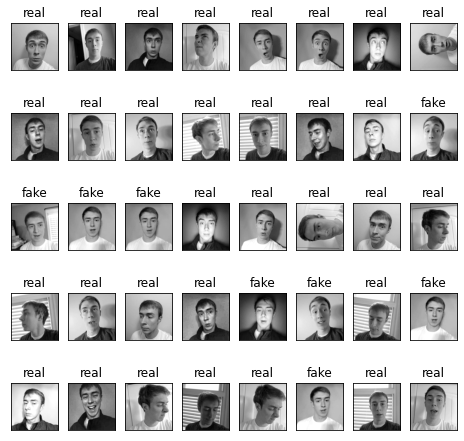

In [ ]:

i = 0
figure = plt.figure(figsize=(8, 8))
columns = 8
rows = 5
ax = []
for batch in train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 256x256
        target_size=(256, 256),
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        color_mode='grayscale'):
    i += 1
    lbl_index = np.nonzero(batch[1][0] == 1)[0][0]
    label = list(class_dictionary.keys())[list(class_dictionary.values()).index(lbl_index)]
    
    ax.append( figure.add_subplot(rows, columns, i) )
    imgplot = plt.imshow(image.array_to_img(batch[0][0,:,:,:]),cmap='gray')
    ax[-1].set_title(label)  # set title
    
    if i % (columns*rows) == 0:
        break
plt.setp(ax, xticks=[], yticks=[])
    
plt.show()

In [ ]:
def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure()
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  
def train_model(model,epochs=25):
  history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=100, callbacks=[])
  plot_history(history)

# Model creation

In [ ]:
model = models.Sequential()
model.add( layers.Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape=(256, 256, 1) ) )
model.add( layers.Conv2D( 128, ( 3, 3 ), activation = 'relu' ) )


model.add( layers.Flatten() )
model.add( layers.Dense( 2, activation = 'softmax' ) )
model.summary()
model.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ],)

train_model(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 128)     73856     
_________________________________________________________________
flatten (Flatten)            (None, 8128512)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 16257026  
Total params: 16,331,522
Trainable params: 16,331,522
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
100/100 [==============================] - 291s 3s/step - loss: 2.0251 - accuracy: 0.6728 - val_loss: 0.6815 - val_accuracy: 0.7338


KeyError: ignored

# Create the Data Generator for the test data

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(256, 256),
        batch_size=20,
        class_mode='categorical',
        color_mode='grayscale')

Found 138 images belonging to 2 classes.


# Evaluate the test data

In [ ]:
testing_loss, testing_acc =model.evaluate_generator(test_generator,                                                    
                                                    max_queue_size=10,
                                                    steps=20,
                                                    workers=1, 
                                                    use_multiprocessing=False, 
                                                    verbose=0)

print( 'testing_acc:', testing_acc )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


testing_acc: 0.739130437374115


# Save the model to a file

In [ ]:
model.save('deepfakeDetectionModel.h5')
